# Fake News classifier using keras

In [5]:
import re
import nltk
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential  

In [18]:
df=pd.read_csv('fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
##Drop na values
df=df.dropna()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [20]:
##get the independent variable
x=df.drop('label',axis=1)

In [21]:
x.shape

(18285, 4)

In [22]:
##get the dependent variable
y=df['label']


In [23]:
y.shape

(18285,)

In [24]:
##vocablary size
voc_size=5000

# one hot representation


In [25]:
messages=x.copy()

In [26]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [27]:
##rearanging the index
messages.reset_index(inplace=True)

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [31]:
##data preprocessing
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=" ".join(review)
    corpus.append(review)

In [32]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic [photos]',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hi

In [33]:
one_hot_repr = [one_hot(word,voc_size) for word in corpus]
one_hot_repr

[[4014, 4186, 1046, 51, 4348, 3294, 2254, 472, 4854, 2817],
 [4702, 3262, 4032, 3053, 577, 2173, 3506],
 [4571, 3344, 2199, 3064],
 [3375, 4238, 32, 194, 788, 4576],
 [3554, 577, 222, 1676, 4031, 3838, 577, 1709, 3601, 2352],
 [2797,
  1339,
  4388,
  81,
  4317,
  945,
  182,
  2434,
  4910,
  4727,
  3174,
  159,
  2146,
  2687,
  3506],
 [2745, 4168, 1723, 2525, 2067, 4164, 112, 4955, 169, 4505, 645],
 [580, 2946, 1486, 4464, 617, 935, 945, 3854, 169, 4505, 645],
 [3577, 4233, 4810, 4662, 96, 4885, 1366, 2636, 945, 265],
 [2183, 2589, 4724, 1988, 1573, 2860, 848, 3599],
 [4594, 3403, 2311, 1352, 3555, 1553, 732, 619, 2304, 1076, 870],
 [194, 757, 4348, 4885, 945, 617],
 [253, 3375, 1062, 4607, 3826, 4281, 1426, 1805, 2270],
 [2848, 2235, 4719, 3389, 2348, 1919, 184, 169, 4505, 645],
 [335, 3394, 3522, 4171, 4937, 169, 4505, 645],
 [4195, 1463, 4330, 4983, 65, 1220, 541, 1721, 4549, 3105],
 [2135, 3730, 3262],
 [1299, 762, 3778, 316, 945, 3439, 2733, 3506],
 [465, 769, 4032, 4311, 24

# Embedding representation

In [36]:
## har ek sentence ko ek length ka kr rhe h (20 len)
sent_len =20
embedding_docs = pad_sequences(one_hot_repr,padding='pre',maxlen=sent_len)
print(embedding_docs)

[[   0    0    0 ...  472 4854 2817]
 [   0    0    0 ...  577 2173 3506]
 [   0    0    0 ... 3344 2199 3064]
 ...
 [   0    0    0 ...  169 4505  645]
 [   0    0    0 ... 1673    8 2330]
 [   0    0    0 ... 3186 1583 3967]]


In [37]:
embedding_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4014,
       4186, 1046,   51, 4348, 3294, 2254,  472, 4854, 2817], dtype=int32)

In [38]:
## creating the network
embedding_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_features,input_length=sent_len))
model.add(Dropout(rate=0.3))
model.add(LSTM(100))
model.add(Dropout(rate=0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [40]:
len(embedding_docs),y.shape

(18285, (18285,))

In [41]:
y_final=np.array(y)
x_final=np.array(embedding_docs)

In [42]:
x_final.shape , y_final.shape

((18285, 20), (18285,))

In [43]:
##train & test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.33,random_state=0)

In [44]:
## Model training
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
192/192 [==============================] - 14s 48ms/step - loss: 0.3385 - accuracy: 0.8345 - val_loss: 0.1845 - val_accuracy: 0.9215
Epoch 2/10
192/192 [==============================] - 9s 45ms/step - loss: 0.1504 - accuracy: 0.9417 - val_loss: 0.1828 - val_accuracy: 0.9284
Epoch 3/10
192/192 [==============================] - 7s 37ms/step - loss: 0.1098 - accuracy: 0.9613 - val_loss: 0.1863 - val_accuracy: 0.9283
Epoch 4/10
192/192 [==============================] - 8s 42ms/step - loss: 0.0875 - accuracy: 0.9694 - val_loss: 0.2009 - val_accuracy: 0.9223
Epoch 5/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0688 - accuracy: 0.9772 - val_loss: 0.2269 - val_accuracy: 0.9226
Epoch 6/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0559 - accuracy: 0.9803 - val_loss: 0.2741 - val_accuracy: 0.9243
Epoch 7/10
192/192 [==============================] - 10s 49ms/step - loss: 0.0444 - accuracy: 0.9858 - val_loss: 0.2972 - val_accuracy: 0.92

In [48]:
pred = model.predict_classes(x_test)

/home/mayank/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
from sklearn.metrics  import accuracy_score,confusion_matrix


In [50]:
accuracy_score(y_test,pred)

0.9173156586578294

In [54]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[3118  271]
 [ 228 2418]]


<AxesSubplot:>

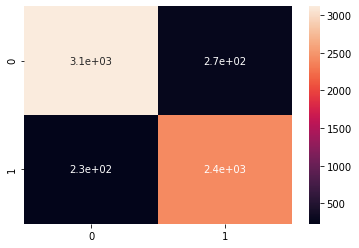

In [53]:
import seaborn as sns
sns.heatmap(cm,annot=True)